# Data setup

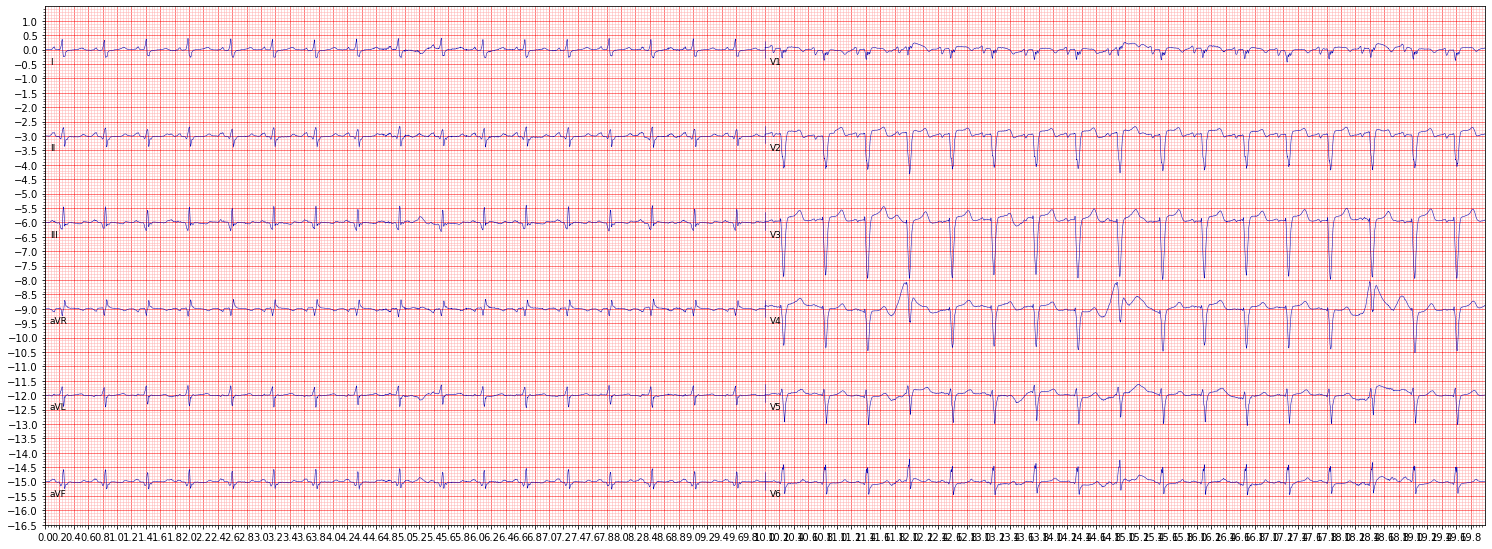

In [2]:
import physionet_challenge_utility_script as pc

import ecg_plot
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow_addons as tfa
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.preprocessing.sequence import pad_sequences
%load_ext autoreload
%autoreload
%reload_ext autoreload

def plot_ecg(path):
    ecg_data = pc.load_challenge_data(path)
    ecg_plot.plot(ecg_data[0]/1000, sample_rate=500, title='')
    ecg_plot.show()
plot_ecg("SM22_MLData/China12Lead/Q0001.mat")


In [3]:
DATADIR = "./SM22_MLData"

In [9]:
gender, age, labels, ecg_filenames = pc.import_key_data(DATADIR)

In [10]:
cache = [0, 0, 0, 0]
cache[0], cache[1], cache[2], cache[3] = gender, age, labels, ecg_filenames

In [32]:
gender, age, labels, ecg_filenames = cache

In [33]:
for i in range(len(labels)-1, -1, -1):
    splitLabel = labels[i].split(",")
    if "426783006" in splitLabel:
        if len(splitLabel) == 1:
            labels.pop(i)
            ecg_filenames.pop(i)
            age.pop(i)
            gender.pop(i)
        else:
            splitLabel.pop(splitLabel.index("426783006"))
            labels[i] = ",".join(splitLabel)
            
ecg_filenames = np.asarray(ecg_filenames)

In [41]:
import os
signal_length=[]
for subdir, dirs, files in sorted(os.walk(DATADIR)):
    for filename in files:
        filepath = subdir + os.sep + filename
        if filepath.endswith(".mat"):
            data, header_data = 
            pc.load_challenge_data(filepath)
            splitted = header_data[0].split()
            signal_length.append(splitted[3])
signal_length_df = pd.DataFrame(signal_length)
signal_count = signal_length_df[0].value_counts()
plt.figure(figsize=(20,10))
#plt.title(title,fontsize =36)
sns.barplot(x=signal_count[:10,].index, y=signal_count[:10,].values)

SyntaxError: invalid syntax (2348200160.py, line 7)

In [34]:
age, gender = pc.import_gender_and_age(age, gender)

gender data shape: 33919
age data shape: 33919


In [35]:
SNOMED_scored=pd.read_csv(f"{DATADIR}/SNOMEDMappings/SNOMED_mappings_scored.csv", sep=";")
SNOMED_unscored=pd.read_csv(f"{DATADIR}/SNOMEDMappings/SNOMED_mappings_unscored.csv", sep=";")
df_labels = pc.make_undefined_class(labels,SNOMED_unscored)

In [36]:
y , snomed_classes = pc.onehot_encode(df_labels)

The classes we will look at are encoded as SNOMED CT codes:
['10370003' '111975006' '164889003' '164890007' '164909002' '164917005'
 '164934002' '164947007' '17338001' '251146004' '270492004' '284470004'
 '39732003' '426177001' '426627000' '427084000' '427172004' '427393009'
 '445118002' '47665007' '59118001' '59931005' '63593006' '698252002'
 '713426002' '713427006' 'undefined class']
classes: 26


In [37]:
y.shape

(33919, 26)

In [38]:
snomed_abbr = []
for j in range(len(snomed_classes)):
    for i in range(len(SNOMED_scored.iloc[:,1])):
        if (str(SNOMED_scored.iloc[:,1][i]) == snomed_classes[j]):
            snomed_abbr.append(SNOMED_scored.iloc[:,2][i])
            
snomed_abbr = np.asarray(snomed_abbr)
snomed_abbr

array(['PR', 'LQT', 'AF', 'AFL', 'LBBB', 'QAb', 'TAb', 'LPR', 'VPB',
       'LQRSV', 'IAVB', 'PAC', 'LAD', 'SB', 'Brady', 'STach', 'PVC', 'SA',
       'LAnFB', 'RAD', 'RBBB', 'TInv', 'SVPB', 'NSIVCB', 'IRBBB', 'CRBBB'],
      dtype='<U6')

In [39]:
y_all_comb = pc.get_labels_for_all_combinations(y)
print("Total number of unique combinations of diagnosis: {}".format(len(np.unique(y_all_comb))))

Total number of unique combinations of diagnosis: 1240


In [40]:
folds = pc.split_data(labels, y_all_comb)

Training split: 30527
Validation split: 3392


/Users/pranav/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=10.
  warnings.warn(


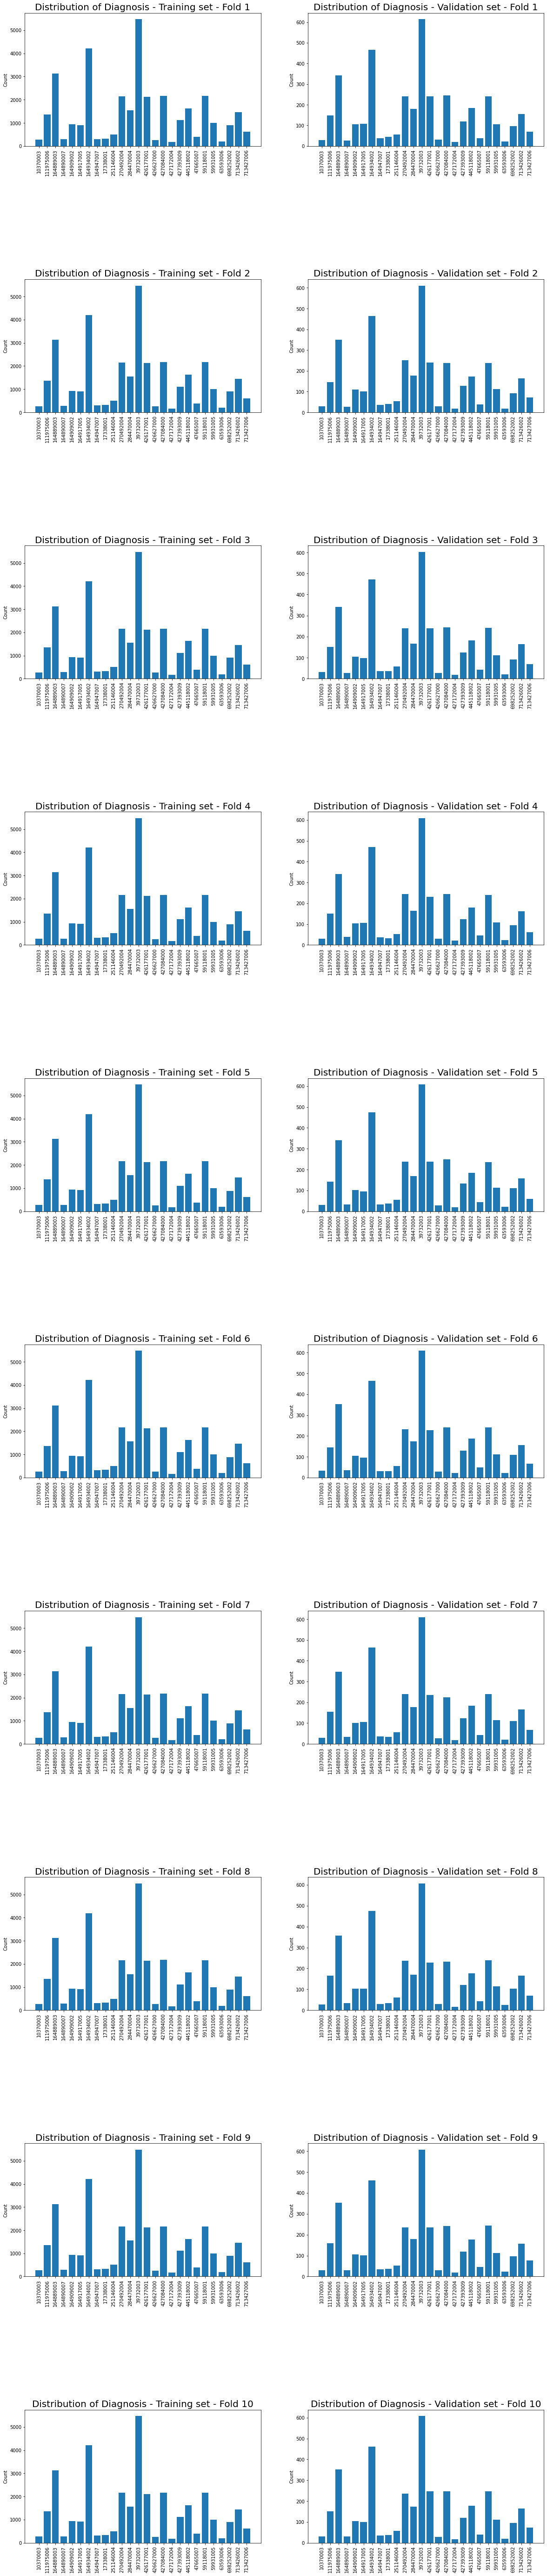

In [41]:
pc.plot_all_folds(folds,y,snomed_classes)

In [42]:
order_array = folds[0][0]
order_array

array([    0,     1,     2, ..., 33916, 33917, 33918])

In [43]:
folds

[(array([    0,     1,     2, ..., 33916, 33917, 33918]),
  array([   10,    12,    25, ..., 33900, 33910, 33911])),
 (array([    0,     3,     5, ..., 33915, 33917, 33918]),
  array([    1,     2,     4, ..., 33878, 33908, 33916])),
 (array([    0,     1,     2, ..., 33915, 33916, 33918]),
  array([    5,     7,     9, ..., 33903, 33906, 33917])),
 (array([    0,     1,     2, ..., 33913, 33916, 33917]),
  array([    3,     8,    22, ..., 33914, 33915, 33918])),
 (array([    0,     1,     2, ..., 33916, 33917, 33918]),
  array([   24,    34,    44, ..., 33904, 33912, 33913])),
 (array([    0,     1,     2, ..., 33916, 33917, 33918]),
  array([   11,    13,    16, ..., 33887, 33893, 33898])),
 (array([    0,     1,     2, ..., 33916, 33917, 33918]),
  array([   35,    53,    96, ..., 33849, 33882, 33902])),
 (array([    0,     1,     2, ..., 33916, 33917, 33918]),
  array([   14,    17,    18, ..., 33894, 33899, 33901])),
 (array([    0,     1,     2, ..., 33916, 33917, 33918]),
  arra

In [44]:
def shuffle_batch_generator_demo(batch_size, gen_x,gen_y, gen_z): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    batch_demo_data = np.zeros((batch_size,2))
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            batch_demo_data[i] = next(gen_z)

        X_combined = [batch_features, batch_demo_data]
        yield X_combined, batch_labels
        
def shuffle_batch_generator(batch_size, gen_x,gen_y): 
    np.random.shuffle(order_array)
    batch_features = np.zeros((batch_size,5000, 12))
    batch_labels = np.zeros((batch_size,snomed_classes.shape[0])) #drop undef class
    while True:
        for i in range(batch_size):

            batch_features[i] = next(gen_x)
            batch_labels[i] = next(gen_y)
            
        yield batch_features, batch_labels

def generate_y_shuffle(y_train):
    while True:
        for i in order_array:
            y_shuffled = y_train[i]
            yield y_shuffled


def generate_X_shuffle(X_train):
    while True:
        for i in order_array:
                #if filepath.endswith(".mat"):
                    data, header_data = pc.load_challenge_data(X_train[i])
                    X_train_new = pad_sequences(data, maxlen=5000, truncating='post',padding="post")
                    X_train_new = X_train_new.reshape(5000,12)
                    yield X_train_new

def generate_z_shuffle(age_train, gender_train):
    while True:
        for i in order_array:
            gen_age = age_train[i]
            gen_gender = gender_train[i]
            z_train = [gen_age , gen_gender]
            yield z_train

In [45]:
new_weights = pc.calculating_class_weights(y)

In [46]:
new_weights

array([[ 0.50444676, 56.72073579],
       [ 0.52334444, 11.20918705],
       [ 0.557072  ,  4.88043165],
       [ 0.50467192, 54.0111465 ],
       [ 0.51583125, 16.29154659],
       [ 0.51539233, 16.74185587],
       [ 0.57989127,  3.62925316],
       [ 0.50506269, 49.88088235],
       [ 0.50543899, 46.46438356],
       [ 0.50833258, 30.50269784],
       [ 0.53796987,  7.08416876],
       [ 0.52685617,  9.80884905],
       [ 0.60933065,  2.78664147],
       [ 0.53737326,  7.18927512],
       [ 0.50428176, 58.88715278],
       [ 0.53810642,  7.06057452],
       [ 0.50278675, 90.21010638],
       [ 0.51897243, 13.67701613],
       [ 0.52811945,  9.3906423 ],
       [ 0.50637466, 39.71779859],
       [ 0.53810642,  7.06057452],
       [ 0.5169476 , 15.25134892],
       [ 0.50318953, 78.88139535],
       [ 0.51514185, 17.01053159],
       [ 0.52493191, 10.52731223],
       [ 0.510275  , 24.83089312]])

In [51]:
keys = np.arange(0,27,1)
weight_dictionary = dict(zip(keys, new_weights.T[1]))
weight_dictionary

{0: 56.720735785953174,
 1: 11.209187045604759,
 2: 4.880431654676259,
 3: 54.011146496815286,
 4: 16.291546589817482,
 5: 16.741855873642645,
 6: 3.6292531564305586,
 7: 49.88088235294118,
 8: 46.464383561643835,
 9: 30.50269784172662,
 10: 7.084168755221387,
 11: 9.80884904569115,
 12: 2.786641472231351,
 13: 7.189275116574819,
 14: 58.88715277777778,
 15: 7.060574521232306,
 16: 90.21010638297872,
 17: 13.677016129032259,
 18: 9.390642303433001,
 19: 39.71779859484778,
 20: 7.060574521232306,
 21: 15.25134892086331,
 22: 78.88139534883722,
 23: 17.010531594784354,
 24: 10.527312228429548,
 25: 24.830893118594435}

In [58]:
reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(
    monitor='val_AUC', factor=0.1, patience=3, verbose=1, mode='max',
    min_delta=0.0001, cooldown=0, min_lr=0
)

early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_AUC', mode='max', verbose=1, patience=2)

In [59]:
from scipy import optimize
def thr_chall_metrics(thr, label, output_prob):
    return -pc.compute_challenge_metric_for_opt(label, np.array(output_prob>thr))

# Model

In [61]:
model = pc.FCN(classes=26)
model.load_weights("secondModelWeights_2v1.h5")

In [ ]:
batchsize = 30

history = model.fit(
    x=shuffle_batch_generator(batch_size=batchsize, gen_x=generate_X_shuffle(ecg_filenames), 
    gen_y=generate_y_shuffle(y)), 
    epochs=28, 
    steps_per_epoch=(len(order_array)/batchsize), 
    validation_data=pc.generate_validation_data(ecg_filenames,y,folds[0][1]), 
    validation_freq=1, 
    class_weight=weight_dictionary, 
    callbacks=[reduce_lr]
)

Epoch 1/28


2022-03-14 18:31:58.839341: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1018/1017 [==============================] - ETA: 0s - loss: 1.8125 - accuracy: 0.9559 - Recall: 0.0309 - Precision: 0.6609 - AUC: 0.7754

2022-03-14 18:39:31.046652: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


1017/1017 [==============================] - 467s 457ms/step - loss: 1.8125 - accuracy: 0.9559 - Recall: 0.0309 - Precision: 0.6609 - AUC: 0.7754 - val_loss: 0.1810 - val_accuracy: 0.9556 - val_Recall: 0.0488 - val_Precision: 0.5530 - val_AUC: 0.7663 - lr: 0.0010
Epoch 2/28
1017/1017 [==============================] - 559s 549ms/step - loss: 1.7410 - accuracy: 0.9561 - Recall: 0.0466 - Precision: 0.6506 - AUC: 0.7962 - val_loss: 0.1693 - val_accuracy: 0.9559 - val_Recall: 0.0705 - val_Precision: 0.5671 - val_AUC: 0.7875 - lr: 0.0010
Epoch 3/28
1017/1017 [==============================] - 613s 602ms/step - loss: 1.6927 - accuracy: 0.9563 - Recall: 0.0572 - Precision: 0.6455 - AUC: 0.8101 - val_loss: 0.1727 - val_accuracy: 0.9560 - val_Recall: 0.0627 - val_Precision: 0.5891 - val_AUC: 0.7783 - lr: 0.0010
Epoch 4/28
1017/1017 [==============================] - 712s 699ms/step - loss: 1.6608 - accuracy: 0.9566 - Recall: 0.0661 - Precision: 0.6504 - AUC: 0.8168 - val_loss: 0.1609 - val_accu

In [56]:
model.save_weights("secondModelWeights_30v1.h5")

In [26]:
ecg_filenames

array(['./SM22_MLData/China12Lead/Q3090.mat',
       './SM22_MLData/China12Lead/Q1687.mat',
       './SM22_MLData/China12Lead/Q0599.mat', ...,
       './SM22_MLData/stpetersburg/I0010.mat',
       './SM22_MLData/stpetersburg/I0004.mat',
       './SM22_MLData/stpetersburg/I0038.mat'], dtype='<U38')

In [51]:
y_pred = model.predict(x=pc.generate_validation_data(ecg_filenames,y,folds[0][1])[0])


In [52]:
pc.generate_validation_data(ecg_filenames,y,folds[0][1])[0]

array([[[ -211,  -218,  -220, ...,  -216,  -223,  -217],
        [ -209,  -204,  -200, ...,  -204,  -192,  -182],
        [ -175,  -178,  -184, ...,  -168,  -179,  -187],
        ...,
        [  348,   285,   229, ...,    11,    -2,   -12],
        [  -20,   -26,   -31, ...,   -52,   -55,   -57],
        [  -58,   -59,   -58, ...,   -58,   -60,   -62]],

       [[   31,    45,    38, ...,    20,    15,    -8],
        [  -17,   -23,   -26, ...,   -30,   -26,   -33],
        [  -36,   -27,   -17, ...,   -30,   -24,   -27],
        ...,
        [  -14,    -4,     9, ...,    21,    24,    27],
        [   22,    22,    19, ...,    15,    12,     9],
        [    2,    -1,     2, ...,   -12,   -14,   -17]],

       [[   -4,    -5,    -8, ...,   -29,   -16,   -17],
        [  -23,   -13,   -18, ...,   -18,   -23,   -30],
        [  -26,   -19,   -27, ...,   -32,   -37,   -32],
        ...,
        [  -61,   -58,   -50, ...,   -53,   -53,   -51],
        [  -58,   -68,   -69, ...,   -68,   -

In [53]:
y_pred

array([[8.25357565e-04, 8.53345916e-03, 1.15926820e-03, ...,
        1.00784062e-03, 1.43442850e-03, 3.15516139e-04],
       [4.76773595e-04, 3.58900167e-02, 4.27840790e-03, ...,
        3.13576846e-03, 1.55409682e-03, 1.65556805e-04],
       [3.53464478e-04, 2.19505541e-02, 5.27744356e-04, ...,
        3.71199887e-04, 6.20840176e-04, 4.72771035e-06],
       ...,
       [8.39866581e-04, 2.41705839e-05, 1.15122534e-01, ...,
        2.93737918e-01, 2.45037735e-01, 2.40788534e-01],
       [4.16352041e-03, 6.91043679e-04, 2.69337557e-02, ...,
        3.92497107e-02, 2.70460024e-02, 1.15358466e-02],
       [4.05211467e-04, 5.78168023e-04, 1.10408831e-02, ...,
        1.96846924e-03, 5.96524402e-03, 4.02243622e-03]], dtype=float32)

In [35]:
init_thresholds = np.arange(0,1,0.05)

In [36]:
all_scores = pc.iterate_threshold(y_pred, ecg_filenames, y ,folds[0][1])

0.15079791501474246
0.31299989604269657
0.3382170398706478
0.31010275037598495
0.25670585541524876
0.19728966082038746
0.13368454690954917
0.07722734233062242
0.0036242900858597295
-0.05380789957250145
-0.12029894973904913
-0.18704371652778842
-0.25584260898538913
-0.32242703432772873
-0.39473054933436186
-0.47340611593415977
-0.5628750813332494
-0.6512351990381826
-0.7402393164265819
-0.8027197676016324


In [54]:
new_best_thr = optimize.fmin(thr_chall_metrics, args=(pc.generate_validation_data(ecg_filenames,y,folds[0][1])[1],y_pred), x0=init_thresholds[all_scores.argmax()]*np.ones(27))#

Optimization terminated successfully.
         Current function value: -0.355319
         Iterations: 336
         Function evaluations: 598


In [55]:
print(pc.compute_challenge_metric_for_opt(pc.generate_validation_data(ecg_filenames,y,folds[0][1])[1],(y_pred>new_best_thr)*1))#

0.35531911496508184


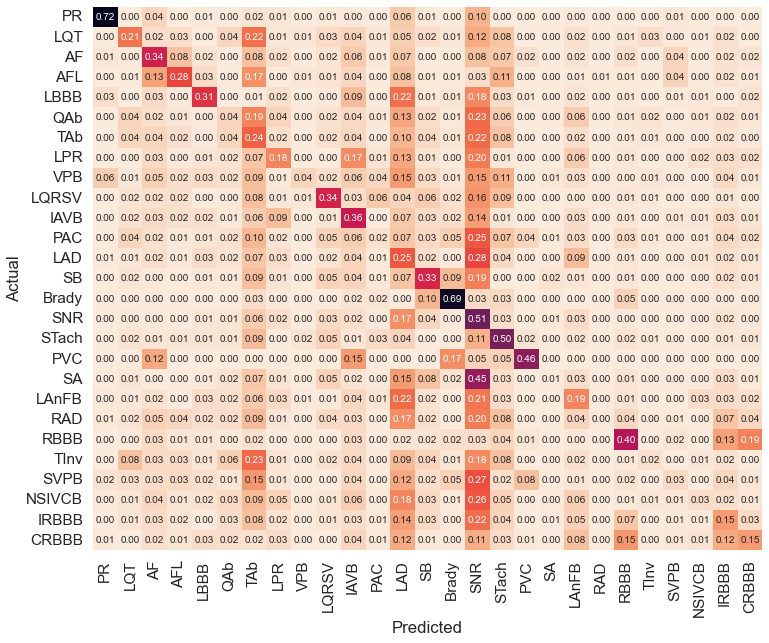

In [56]:
pc.plot_normalized_conf_matrix(y_pred, ecg_filenames, y, folds[0][1], new_best_thr, snomed_classes,snomed_abbr)
plt.savefig("confusion_matrix_fcn.png", dpi = 100)

In [57]:
from sklearn.metrics import confusion_matrix

In [63]:
confusion_matrix(pc.generate_validation_data(pc.generate_validation_data(ecg_filenames,y,folds[0][1])[1],(y_pred>new_best_thr)*1))

TypeError: generate_validation_data() missing 1 required positional argument: 'test_order_array'